In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization,Dropout

In [2]:
df = pd.read_csv('kidney_dataset.csv')

In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state = 42)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=0.1,random_state = 42)
print(X.shape)
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(400, 13)
(324, 13)
(36, 13)
(40, 13)


In [4]:
model = Sequential()
model.add(Dense(10, input_dim=13, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(7, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train,validation_data = (X_validation,y_validation), epochs=100, batch_size=64)

Epoch 1/100
6/6 [==============================] - 0s 19ms/step - loss: 0.7561 - accuracy: 0.4938 - val_loss: 0.6973 - val_accuracy: 0.3889
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.6019 - val_loss: 0.6952 - val_accuracy: 0.3056
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7076 - accuracy: 0.5278 - val_loss: 0.6922 - val_accuracy: 0.4167
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5278 - val_loss: 0.6885 - val_accuracy: 0.5000
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.5772 - val_loss: 0.6843 - val_accuracy: 0.5278
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.5864 - val_loss: 0.6802 - val_accuracy: 0.5556
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.5988 - val_loss: 0.6755 - val_accuracy: 0.6111
Epoch 8/100
6/6 [=========

6/6 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8827 - val_loss: 0.2575 - val_accuracy: 0.9444
Epoch 60/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8642 - val_loss: 0.2521 - val_accuracy: 0.9444
Epoch 61/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3443 - accuracy: 0.8735 - val_loss: 0.2464 - val_accuracy: 0.9444
Epoch 62/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8858 - val_loss: 0.2428 - val_accuracy: 0.9444
Epoch 63/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8796 - val_loss: 0.2382 - val_accuracy: 0.9722
Epoch 64/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3322 - accuracy: 0.8858 - val_loss: 0.2356 - val_accuracy: 0.9722
Epoch 65/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.8673 - val_loss: 0.2317 - val_accuracy: 0.9722
Epoch 66/100
6/6 [===============

In [7]:
y_pred =  model.predict(X_test)

In [8]:
import numpy as np
y_pred.shape
y_pred = np.round(y_pred)

In [9]:
import sklearn.metrics as metrics
print(metrics.accuracy_score(y_pred,y_test))

0.975


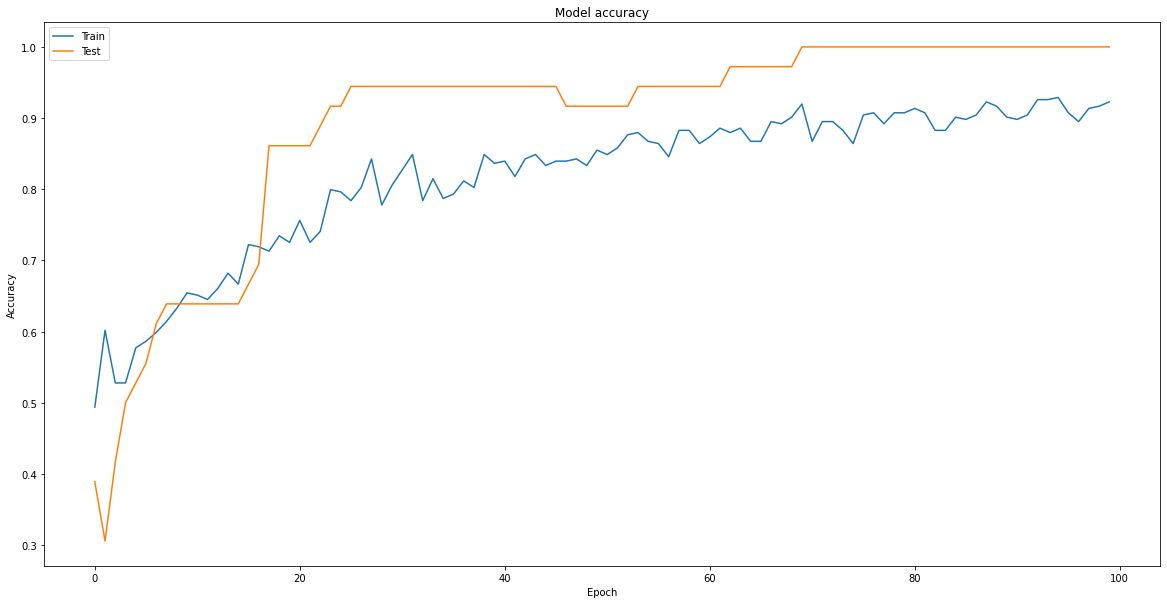

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
for key in history.history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


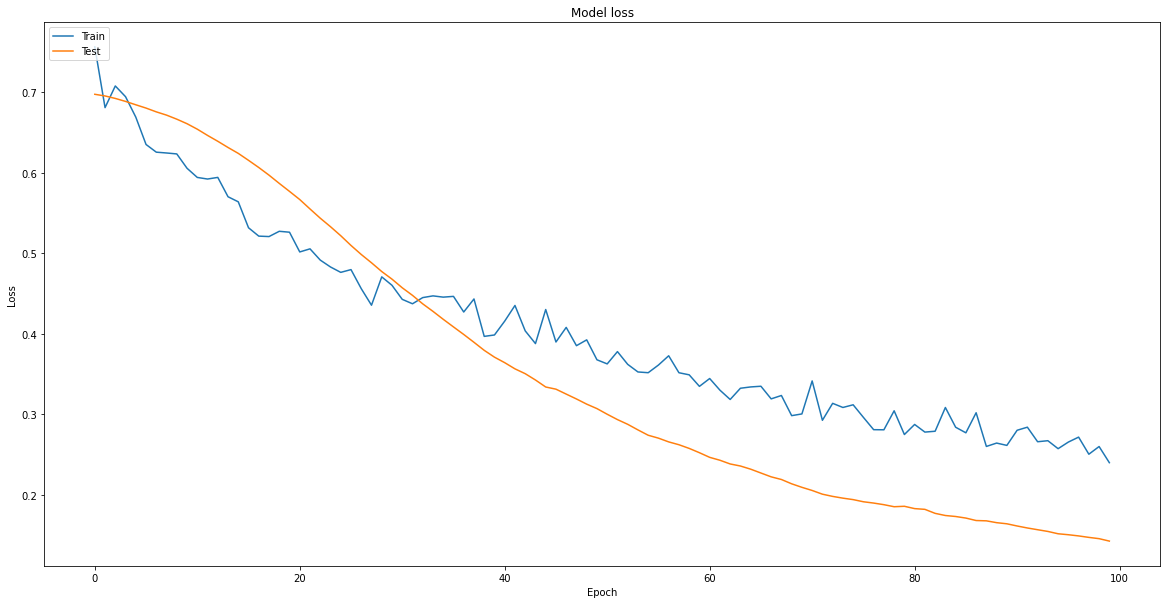

In [12]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<AxesSubplot:>

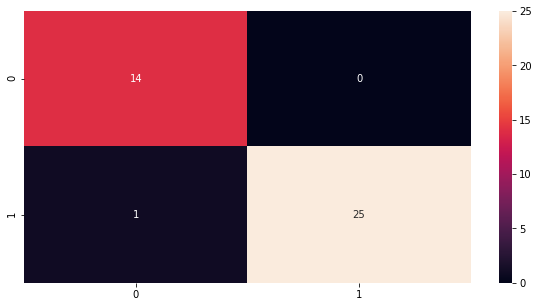

In [13]:
import seaborn as sns
plt.figure(figsize=(10,5))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [14]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.96      0.98        26

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [17]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[14,  0],
       [ 1, 25]])

In [19]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.975

In [21]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)

array([1.        , 0.96153846])

In [22]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.93333333, 1.        ])